In [2]:
import numpy as np
import pandas as pd
import datetime 

## Dataset British Flickr

In [2]:
# importando o dataset
df_flickr_book = pd.read_csv('Dataset/BL-Flickr-Images-Book.csv')

In [3]:
# conhecendo o df
df_flickr_book.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [4]:
# informações sobre o df 
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [5]:
# realizando o drop de algumas colunas
colunas_drop = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver', 'Contributors', 'Issuance type', 'Shelfmarks']
df_flickr_book.drop(columns = colunas_drop, axis = 1, inplace = True)

In [6]:
df_flickr_book.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [10]:
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            8287 non-null   int64 
 1   Place of Publication  8287 non-null   object
 2   Date of Publication   8106 non-null   object
 3   Publisher             4092 non-null   object
 4   Title                 8287 non-null   object
 5   Author                6509 non-null   object
 6   Flickr URL            8287 non-null   object
dtypes: int64(1), object(6)
memory usage: 453.3+ KB


In [15]:
# verificando de existe valor unico para o dataset(chave)
# True - Quer dizer que todos os valores são unicos para a coluna Identifier
print(df_flickr_book['Identifier'].is_unique)

# contando a quantidade de valores unicos 
print(df_flickr_book['Identifier'].nunique())

True
8287


In [19]:
# seleciona as linhas que contem a data de publicação do indice 1905 até o final
df_flickr_book.loc[1905:, 'Date of Publication'].head(10) 

1905         1879
1906         1886
1907         1844
1908    1861-1909
1909         1884
1910         1885
1911         1834
1912         1837
1913         1867
1914         1830
Name: Date of Publication, dtype: object

In [21]:
# tratando a coluna Data of Publication de cada um dos livros atraves de expressões regulares
expre_regular = r'^(\d{4})' # define a expressão regular que deve ser utilizada para cada uma das linhas (encontra o conjunto com 4 digitos)
extr = df_flickr_book['Date of Publication'].str.extract(expre_regular, expand = False) # aplica o modelo de extração atraves de expressão regular definida

In [22]:
extr[1905:]

1905    1879
1906    1886
1907    1844
1908    1861
1909    1884
        ... 
8282    1838
8283    1831
8284     NaN
8285    1834
8286    1834
Name: Date of Publication, Length: 6382, dtype: object

In [23]:
# aplicando no dataset e convertendo para numerico
df_flickr_book['Date of Publication'] = pd.to_numeric(extr)

In [24]:
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Identifier            8287 non-null   int64  
 1   Place of Publication  8287 non-null   object 
 2   Date of Publication   7316 non-null   float64
 3   Publisher             4092 non-null   object 
 4   Title                 8287 non-null   object 
 5   Author                6509 non-null   object 
 6   Flickr URL            8287 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 453.3+ KB


In [26]:
# contando a quantidade de registros nulos para a coluna Data of Publication
df_flickr_book['Date of Publication'].isnull().sum()

971

In [27]:
# dropando os registros com a coluna Data of Publication igual a nulo
df_flickr_book.dropna(subset = ['Date of Publication'], inplace = True)
df_flickr_book['Date of Publication'] = df_flickr_book['Date of Publication'].astype(int) # convertendo os valores para int

In [28]:
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            7316 non-null   int64 
 1   Place of Publication  7316 non-null   object
 2   Date of Publication   7316 non-null   int32 
 3   Publisher             3576 non-null   object
 4   Title                 7316 non-null   object
 5   Author                5782 non-null   object
 6   Flickr URL            7316 non-null   object
dtypes: int32(1), int64(1), object(5)
memory usage: 748.7+ KB


In [29]:
# identificando os locais de publicação dos livrod
df_flickr_book['Place of Publication'].head(10)

0                       London
1     London; Virtue & Yorston
2                       London
3                       London
4                       London
5                       London
6                       London
8                      London]
9                       London
10                    Coventry
Name: Place of Publication, dtype: object

In [30]:
# verificando os registros que possuem a cidade London como local de publicação
df_flickr_book['Place of Publication'].str.contains('London').head(10)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
8      True
9      True
10    False
Name: Place of Publication, dtype: bool

In [31]:
london = df_flickr_book['Place of Publication'].str.contains('London') # cria a serie que contem os vslores True e False para a cidade de London
oxford = df_flickr_book['Place of Publication'].str.contains('Oxford') # cria a serie que contem os vslores True e False para a cidade de Oxford

In [35]:
# aplica o where para prencher cada uma das sentenças
df_flickr_book['Place of Publication'] = np.where(london, 'London', np.where(oxford, 'Oxford', df_flickr_book['Place of Publication'].str.replace('-', '')))

In [36]:
df_flickr_book.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## Dataset Diabetes

In [5]:
pima_dataset = pd.read_csv('Dataset/pima-indians-diabetes.csv', header = None)

### Descrição das colunas do Dataset

0 - numeros de vezes que ficou gravida

1 - concentração de glicose

2 - pressão diastolica

3 - tickness

4 - insulina em jejum

5 - indice de massa corporal

6 - diabetes function

7 - idade
 
8 - possui ou não diabetes (1 ou 0)

In [6]:
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# resumo estatistico do Dataset
pima_dataset.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# verificando onde existem valores iguais a zero, e tratar os valores
pima_dataset.drop(columns = [0,8], axis = 1)[pima_dataset.eq(0).any(1)]

,1,2,3,4,5,6,7
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [17]:
# contando a qtde de valores zeros em cada uma das colunas que não poderiam estar
(pima_dataset[[1,2,3,4,5]] == 0).sum()

1      5
2     35
3    227
4    374
5     11
dtype: int64

In [19]:
# substituindo os valores zero por NA
pima_dataset[[1,2,3,4,5]] = pima_dataset[[1,2,3,4,5]].replace(0, np.NaN)

In [20]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       763 non-null    float64
 2   2       733 non-null    float64
 3   3       541 non-null    float64
 4   4       394 non-null    float64
 5   5       757 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [22]:
# quantidade de registros NA em cada coluna
pima_dataset.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [24]:
# criando um novo df sem os valores NA
df_remove_na = pima_dataset.dropna()
df_remove_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       392 non-null    int64  
 1   1       392 non-null    float64
 2   2       392 non-null    float64
 3   3       392 non-null    float64
 4   4       392 non-null    float64
 5   5       392 non-null    float64
 6   6       392 non-null    float64
 7   7       392 non-null    int64  
 8   8       392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [25]:
df_remove_na.head()

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [27]:
df_remove_na.describe()

,0,1,2,3,4,5,6,7,8
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


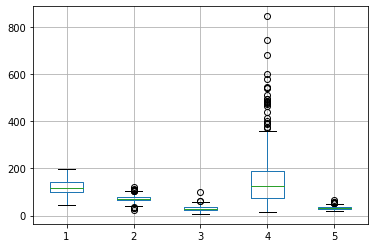

In [28]:
# identificando os outliers
pima_dataset.boxplot([1,2,3,4,5])

In [29]:
# preenchendo os valores nulos com a média dos demias valores não nulos da coluna
df_nan_media = pima_dataset.fillna(pima_dataset.mean())
df_nan_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [30]:
df_nan_media.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## Dataset Cars

In [31]:
# importando o dataset
df_carros = pd.read_csv('DataSet/imports-85.txt', sep = ',', header = None, na_values = '?')

In [32]:
df_carros.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [33]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

In [35]:
headers = {0: 'Symboling', 1: 'Normalized_losses', 2: 'make', 3: 'Fuel_type', 4: 'Aspiration',
5: 'Num_doors', 6: 'Body_style', 7: 'Drive_wheels', 8: 'Engine_location', 9: 'Wheel_base', 10: 'Length', 11: 'Width', 12: 'Height', 13: 'Curb_Weight',
14: 'Engine_type', 15: 'Num_cylinders', 16: 'Engine_size', 17: 'Fuel_system', 18: 'Bore', 19: 'Stroke', 20: 'Compression_rate', 21: 'Horsepower', 22: 'Peak_rpm',
23: 'City_mpg', 24: 'Highway_mpg', 25: 'Price'}

In [37]:
df_carros.rename(columns = headers, inplace = True)
df_carros.head()

,Symboling,Normalized_losses,make,Fuel_type,Aspiration,Num_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_rate,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [39]:
# contagem da quantidade de 'object' existente no dataset
df_carros.dtypes.eq('object').sum()

10

In [41]:
# seleciona apenas os dados categoricos
# realiza uma coia do dataset apenas para as colunas object
df_carros_string = df_carros.select_dtypes(include = ['object']).copy()
df_carros_string.head()

,make,Fuel_type,Aspiration,Num_doors,Body_style,Drive_wheels,Engine_location,Engine_type,Num_cylinders,Fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [42]:
# verificando se existem valores nulos
df_carros_string.isnull().sum()

make               0
Fuel_type          0
Aspiration         0
Num_doors          2
Body_style         0
Drive_wheels       0
Engine_location    0
Engine_type        0
Num_cylinders      0
Fuel_system        0
dtype: int64

In [43]:
# realiza drop das colunas com valores NA
df_carros_string.dropna(inplace = True)

In [44]:
df_carros_string.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             203 non-null    object
 1   Fuel_type        203 non-null    object
 2   Aspiration       203 non-null    object
 3   Num_doors        203 non-null    object
 4   Body_style       203 non-null    object
 5   Drive_wheels     203 non-null    object
 6   Engine_location  203 non-null    object
 7   Engine_type      203 non-null    object
 8   Num_cylinders    203 non-null    object
 9   Fuel_system      203 non-null    object
dtypes: object(10)
memory usage: 27.4+ KB


In [45]:
# conta os valores para cada umas das classes
df_carros_string['Num_cylinders'].value_counts()

four      157
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: Num_cylinders, dtype: int64

In [46]:
# utilizando o dicionario e a função replace para transformar em numericos
mapeamento_classes = {
    'Num_doors': {'four': 4, 'two': 2},
    'Num_cylinders': {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twleve': 12, 'three': 3}
}

In [47]:
# aplicando a função replace
df_carros_string.replace(mapeamento_classes, inplace = True)
df_carros_string.head()

,make,Fuel_type,Aspiration,Num_doors,Body_style,Drive_wheels,Engine_location,Engine_type,Num_cylinders,Fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [49]:
# aplicando label encoding
df_carros_string['Body_style'] = df_carros_string['Body_style'].astype('category')
df_carros_string.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   make             203 non-null    object  
 1   Fuel_type        203 non-null    object  
 2   Aspiration       203 non-null    object  
 3   Num_doors        203 non-null    int64   
 4   Body_style       203 non-null    category
 5   Drive_wheels     203 non-null    object  
 6   Engine_location  203 non-null    object  
 7   Engine_type      203 non-null    object  
 8   Num_cylinders    203 non-null    object  
 9   Fuel_system      203 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 26.3+ KB


In [52]:
# apos definir como categorico, é possivel realizar o procedimento de label encoding
df_carros_string['Body_style_cat'] = df_carros_string['Body_style'].cat.codes
df_carros_string.head()

,make,Fuel_type,Aspiration,Num_doors,Body_style,Drive_wheels,Engine_location,Engine_type,Num_cylinders,Fuel_system,Body_style_cat
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3


In [54]:
df_carros_string['Drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [55]:
# aplicando o One-Hot enconding sobre os valores de tração do carro
pd.get_dummies(df_carros_string, columns = ['Drive_wheels']).head()

,make,Fuel_type,Aspiration,Num_doors,Body_style,Engine_location,Engine_type,Num_cylinders,Fuel_system,Body_style_cat,Drive_wheels_4wd,Drive_wheels_fwd,Drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0
